# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy import stats
from numpy import sqrt,pi
from scipy.stats import norm
medical = pd.read_csv('data/insurance2.csv')

In [27]:
medical.shape

(1338, 8)

In [28]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

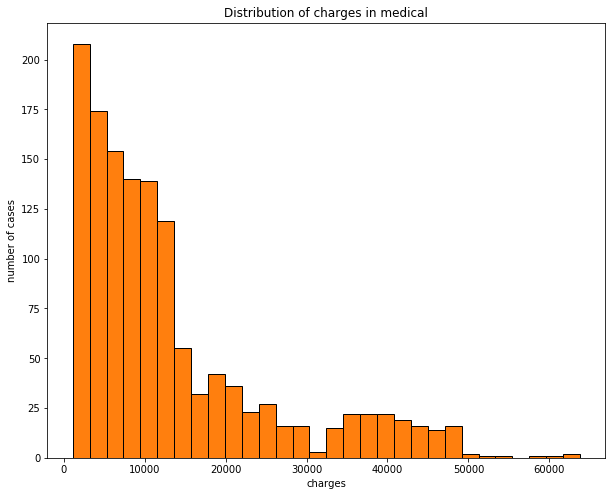

In [29]:
_ = plt.figure(figsize=[10,8])
_ = plt.hist(medical.charges, bins=30, color='C1', ec='black')
_ = plt.xlabel('charges')
_ = plt.ylabel('number of cases')
_ = plt.title('Distribution of charges in medical')

In [30]:
#help(plt.hist)

In [31]:
data_charges_mean = np.mean(medical.charges)
data_charges_mean

13270.422265141257

In [32]:
data_charges_std = np.std(medical.charges)
data_charges_std

12105.484975561605

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ In order to show that the given sample is a good representation of the actual distribution, sampling variability test should be performed.
According to the CLT, as the number of samples increases, the distribution of samples becomes more and more like a  normal distribution. 
Therefore, based on the parameters from the given sample, we develop a normal distribution and make samples of size 1000 from it to create simulated samples. This process is repeated for 1000 times to generate 1000 samples of size 1000.

In [33]:
# generate sample fot sampling variability test
def generate_samples(dist, n):
    sample_means = []
    sample_std = []
    for i in range(n):
        new_sample = norm.rvs(loc=data_charges_mean, scale=data_charges_std, size=1000)
        sample_means.append(np.mean(new_sample))
        sample_std.append(np.std(new_sample))
    return sample_means, sample_std

In [34]:
new_generated_samples_mean, new_generated_samples_std = generate_samples(medical.charges, 1000)

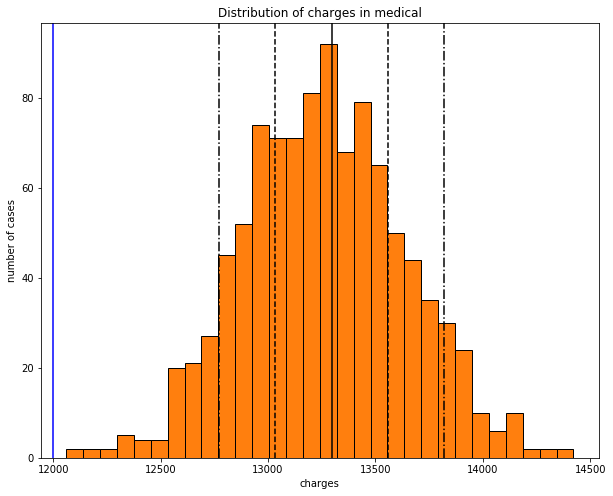

In [35]:
# plot the histogram for the mean of generated samples
_ = plt.figure(figsize=[10,8])
_ = plt.hist(new_generated_samples_mean, bins=30, color='C1', ec='black')
_ = plt.xlabel('charges')
_ = plt.ylabel('number of cases')
_ = plt.title('Distribution of charges in medical')
_ = plt.axvline(13296.3, color='k')
_ = plt.axvline(13296.3+262.55, color='k', linestyle='--')
_ = plt.axvline(13296.3-262.55, color='k', linestyle='--')
_ = plt.axvline(13296.3+525, color='k', linestyle='-.')
_ = plt.axvline(13296.3-525, color='k', linestyle='-.')
_ = plt.axvline(12000, color='b')

In [36]:
# mean of the generated sample
np.mean(new_generated_samples_mean)

13263.747713943989

In [37]:
# check the minimum of the mean to compare with 12000 threshold
np.min(new_generated_samples_mean)

12060.660074238234

In [38]:
# standard deviation of the generated sample
np.std(new_generated_samples_std)

285.85897917376565

In the above picutre the histogram of the mean of all the generated samples is plotted. As it can be seen above, the mean of the generated samples' means is 13257.867 which is very close to the mean of the given sample (medical.charges data) which is 13270.422.
Also, the standard deviation of the generated samples' means shows that the 95% confidence interval of the means of the generated samples is way over the 12000 threshold that hosptial has concerns about. As shown in the histogram, the probability that charges fall below the 12000 threshold is very low.
Therefore, we can see that the sampling variability test is an appropriate frequentist test to be employed for this project.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ The appropriate confidence interval would be 95% to make sure that 12000 is an outlier. For this case, one-sided interval should be considered since administrator is worried about the charges dropping below 12000. 

In [39]:
#Critical value
n = len(medical.charges)
#t = norm.ppf(0.05, loc=data_charges_mean, scale=data_charges_std)
#p = norm.cdf(t, df)
c_value = t.ppf(0.95, n-1)

In [40]:
#marrgine of error:
m_error =c_value * (data_charges_std / sqrt(n))
m_error

544.7314053390934

In [41]:
# Confidence Interval of the mean:
print("Confidence Interval's lower bound: ", data_charges_mean - m_error)

Confidence Interval's lower bound:  12725.690859802164


The administrator should not be concered since the 95% confidence interval is more than 12725.690 which is greater than 12000 threshold.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ 
* The null hypothesis (H0) is that the means of the charges for people with insurance and without insurance are the same:
mean1 - mean2 = 0
* The alternative hypothesis is that the charges for people with insurance and without insurance are not the same:
mean1 - mean2 != 0

In this question, it is assumed that the two groups have equal variances.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [42]:
# pool standard deviation:
def calculate_t_test(sample0, sample1, sample_size0, sample_size1):
    mean0 = np.mean(sample0)
    mean1 = np.mean(sample1)
    std0 = np.std(sample0, ddof =1)
    std1 = np.std(sample1, ddof =1)
    
    # pooled standard deviation
    sp = sqrt(((sample_size0 - 1)* std0**2 + (sample_size1 - 1)* std1**2)/(sample_size0 + sample_size1 - 2))
    
    #t-test
    t = (mean0 - mean1) / (sp * sqrt((1 / sample_size0) + (1 / sample_size1)))
    
    return t

In [43]:
#create a new Dataframe based on the people with medical insurance:
charged_by_insurance = medical[medical.insuranceclaim == 1]

#create a new Dataframe based on the people without medical insurance:
charged_without_insurance = medical[medical.insuranceclaim == 0]

In [44]:
sample0 = charged_by_insurance.charges

In [45]:
sample1 = charged_without_insurance.charges

In [46]:
# H0 (null hypothesis) suppose the means of two samples are same:
t_test = calculate_t_test(sample0, sample1, len(sample0), len(sample1))
t_test

11.89329903087671

In [47]:
df = len(sample0) + len(sample1) - 2

In [48]:
#p-value after comparison with the t
#p = 2 * t.cdf(t_test, df)
#p = 1 - t.cdf(t_test,df)

pval = stats.t.sf(np.abs(t_test), df)*2
pval

4.461230231620972e-31

In [49]:
stats.ttest_ind(sample0, sample1, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [50]:
stats.ttest_ind(sample0, sample1, axis=0, equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ A z-test or z-score is used to determine whether two population means are different when the variances are known and the sample size is large. 
* t-test is used when the sample size is small and standard deviation is unknown. 
* z-test is used when sample fallows normal distribution and standard deviation is known.

<p>z-score can be calculated using:  
<br /> scipy.stats.zscore(...)
 <br>

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test